In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


data = pd.read_csv('Marketing_Analysis.csv', skiprows=2)

data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [2]:
data['job'] = data['jobedu'].apply(lambda x:x.split(',')[0])
data['education'] = data['jobedu'].apply(lambda x:x.split(',')[1])


data.drop('jobedu', axis=1, inplace=True)

data.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [3]:
data.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
education      0
dtype: int64

In [4]:
data = data[~data.age.isnull()].copy()

data.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
education      0
dtype: int64

In [5]:
month_mode = data.month.mode()[0]

data.month.fillna(month_mode, inplace=True)


data.month.isnull().sum()

0

In [6]:
data = data[~data.response.isnull()].copy()


data.isnull().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job           0
education     0
dtype: int64

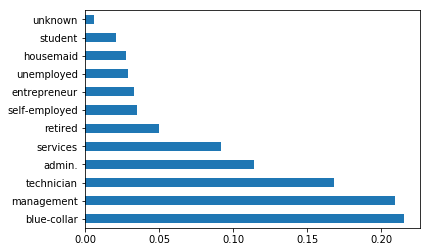

In [9]:
data.job.value_counts(normalize=True)


data.job.value_counts(normalize=True).plot.barh()

plt.show()

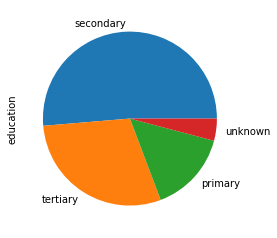

In [11]:
data.education.value_counts(normalize=True)


data.education.value_counts(normalize=True).plot.pie()

plt.show()

In [13]:
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

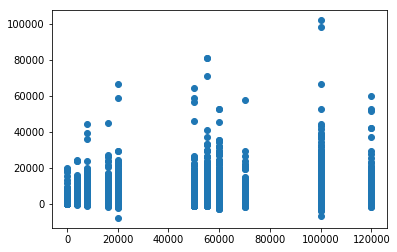

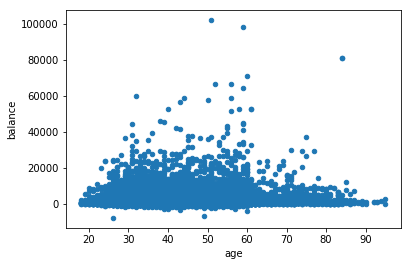

In [15]:
plt.scatter(data.salary, data.balance)
plt.show()


data.plot.scatter(x='age', y='balance')
plt.show()

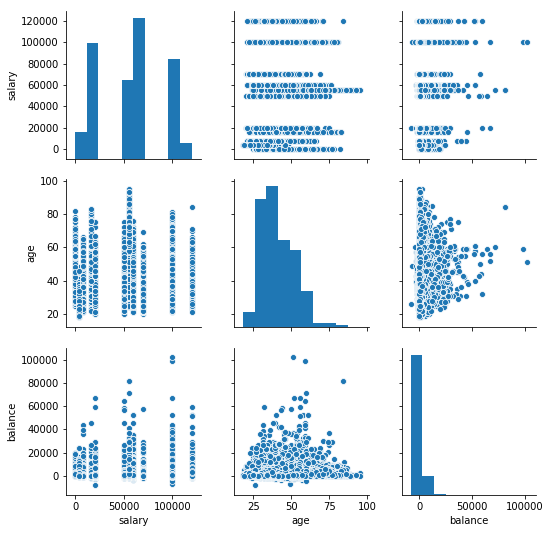

In [16]:
sns.pairplot(data=data, vars=['salary', 'age', 'balance'])
plt.show()

In [18]:
#Correlation Matrix

data[['salary', 'age', 'balance']].corr()

,salary,age,balance
salary,1.000000,0.024513,0.055489
age,0.024513,1.000000,0.097710
balance,0.055489,0.097710,1.000000


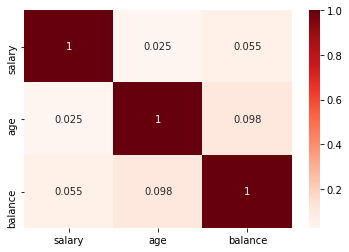

In [20]:
sns.heatmap(data[['salary', 'age', 'balance']].corr(), annot=True, cmap='Reds')
plt.show()

In [21]:
data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [22]:
data.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

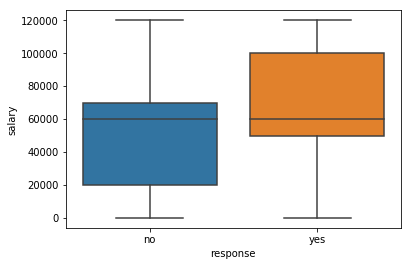

In [24]:
sns.boxplot(data.response, data.salary)
plt.show()

In [26]:
data['response_rate'] = np.where(data.response=='yes', 1, 0)
data['response_rate'].value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

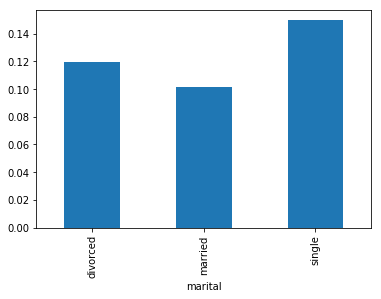

In [27]:
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

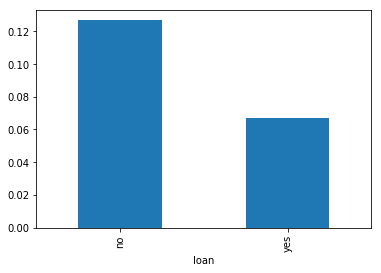

In [28]:
data.groupby('loan')['response_rate'].mean().plot.bar()
plt.show()

In [31]:
result = pd.pivot_table(data=data, index='education', columns='marital', values='response_rate')
result

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


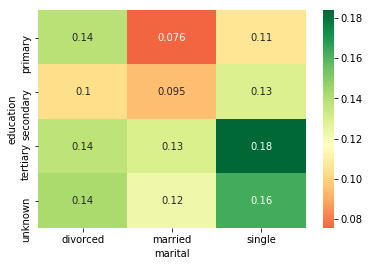

In [32]:
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()